In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [8]:
names = ['sepal-length' , 'sepal-width' , 'petal-length' , 'petal-width' , 'class']
dataset  = pd.read_csv('C:/Users/User/iris.csv') , names=names)

In [11]:
dataset  = pd.read_csv('C:/Users/User/iris.csv')

In [9]:
print(dataset.shape)

(151, 5)


In [12]:
print(dataset.head(20))

    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8         

In [15]:
print(dataset.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


In [18]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7 
X_train,X_validation,Y_train,Y_validation = model_selection.train_test_split(X,Y,test_size=validation_size)
scoring = 'accuracy'  


In [21]:
models = []
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))
models.append(('SVM' , SVC()))

results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10 , random_state=seed)
    cv_results = model_selection.cross_val_score(model , X_train , Y_train , cv=kfold,
                                                scoring=scoring)
    names.append(name)
    msg = "%s: %f(%f)" % (name , cv_results.mean() , cv_results.std())
    print(msg)

LR: 0.941667(0.075000)
LDA: 0.966667(0.055277)
KNN: 0.950000(0.076376)
CART: 0.925000(0.058333)
NB: 0.958333(0.055902)
SVM: 0.966667(0.055277)


In [1]:
import numpy as np
import pandas as pd

from pandas import Series,DataFrame


In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns


sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [7]:
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,'Number of Houses')

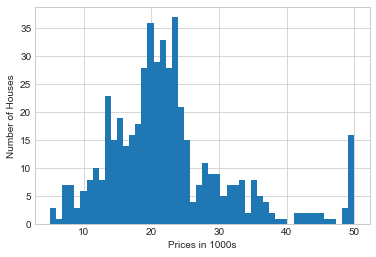

In [8]:
plt.hist(boston.target , bins = 50)

plt.xlabel('Prices in 1000s')
plt.ylabel('Number of Houses')

Text(0.5,0,'Number in rooms')

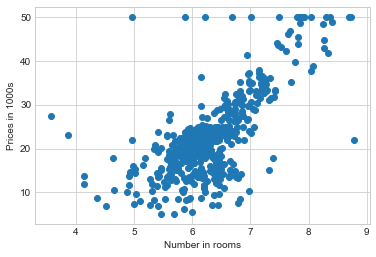

In [9]:
plt.scatter(boston.data[:,5], boston.target)

plt.ylabel('Prices in 1000s')
plt.xlabel('Number in rooms')

In [13]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
boston_df['Price'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


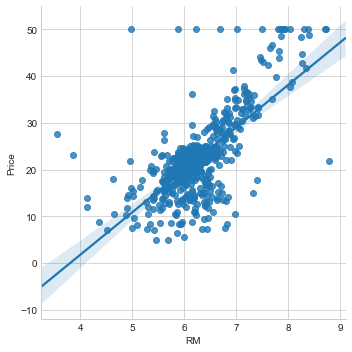

In [15]:
sns.lmplot('RM' , 'Price' , data = boston_df)

In [17]:
X = boston_df.RM

X.shape

(506,)

In [21]:
X= np.vstack(boston_df.RM)

X.shape

(506, 1)

In [23]:
X = np.array( [[ value , 1] for value in X])

X

array([[array([array([ 6.575]), 1], dtype=object), 1],
       [array([array([ 6.421]), 1], dtype=object), 1],
       [array([array([ 7.185]), 1], dtype=object), 1],
       ..., 
       [array([array([ 6.976]), 1], dtype=object), 1],
       [array([array([ 6.794]), 1], dtype=object), 1],
       [array([array([ 6.03]), 1], dtype=object), 1]], dtype=object)

In [29]:
m , b = np.linalg.lstlq(X , Y)

AttributeError: module 'numpy.linalg' has no attribute 'lstlq'

In [28]:
Y = boston_df.Price

NameError: name 'm' is not defined

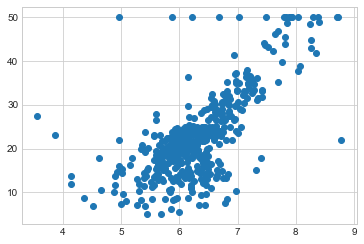

In [33]:
plt.plot(boston_df.RM, boston_df.Price , 'o')

x = boston_df.RM

plt.plot(x , m*x + b , 'r' , label = 'Best Fit Line')